In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

In [2]:
data = pd.read_csv('macrodata-2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    float64
 1   quarter   203 non-null    float64
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(14)
memory usage: 22.3 KB


In [3]:
periods = pd.PeriodIndex(year = data.year, quarter = data.quarter, name = 'date')

periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203)

In [4]:
periods.to_timestamp('D', 'start')

DatetimeIndex(['1959-01-01', '1959-04-01', '1959-07-01', '1959-10-01',
               '1960-01-01', '1960-04-01', '1960-07-01', '1960-10-01',
               '1961-01-01', '1961-04-01',
               ...
               '2007-04-01', '2007-07-01', '2007-10-01', '2008-01-01',
               '2008-04-01', '2008-07-01', '2008-10-01', '2009-01-01',
               '2009-04-01', '2009-07-01'],
              dtype='datetime64[ns]', name='date', length=203, freq='QS-OCT')

In [5]:
data.index

RangeIndex(start=0, stop=203, step=1)

In [6]:
data.index = periods.to_timestamp('D', 'start')

In [7]:
columns = pd.Index(['realgdp', 'realcons', 'realinv', 'cpi', 'unemp', 'infl', 'realint'], name = 'item')

columns

Index(['realgdp', 'realcons', 'realinv', 'cpi', 'unemp', 'infl', 'realint'], dtype='object', name='item')

In [8]:
data = data.reindex(columns = columns)

data.head()

item,realgdp,realcons,realinv,cpi,unemp,infl,realint
date,,,,,,,
1959-01-01,2710.349,1707.4,286.898,28.98,5.8,0.00,0.00
1959-04-01,2778.801,1733.7,310.859,29.15,5.1,2.34,0.74
1959-07-01,2775.488,1751.8,289.226,29.35,5.3,2.74,1.09
1959-10-01,2785.204,1753.7,299.356,29.37,5.6,0.27,4.06
1960-01-01,2847.699,1770.5,331.722,29.54,5.2,2.31,1.19


In [9]:
data.stack().head(10)

date        item    
1959-01-01  realgdp     2710.349
            realcons    1707.400
            realinv      286.898
            cpi           28.980
            unemp          5.800
            infl           0.000
            realint        0.000
1959-04-01  realgdp     2778.801
            realcons    1733.700
            realinv      310.859
dtype: float64

In [15]:
data.iloc[data.infl == 2]

ValueError: iLocation based boolean indexing cannot use an indexable as a mask

In [42]:
data2 = pd.read_csv('world_bank_development_indicators.csv')

In [43]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16780 entries, 0 to 16779
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    16780 non-null  object 
 1   date                                       16780 non-null  object 
 2   agricultural_land%                         15298 non-null  float64
 3   forest_land%                               7914 non-null   float64
 4   land_area                                  15608 non-null  float64
 5   avg_precipitation                          10086 non-null  float64
 6   trade_in_services%                         9165 non-null   float64
 7   control_of_corruption_estimate             4564 non-null   float64
 8   control_of_corruption_std                  4564 non-null   float64
 9   access_to_electricity%                     7348 non-null   float64
 10  renewvable_energy_cons

In [44]:
data2.head()

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN
1,Afghanistan,1961-01-01,57.801696,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN
2,Afghanistan,1962-01-01,57.893688,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN
3,Afghanistan,1963-01-01,57.970348,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN
4,Afghanistan,1964-01-01,58.066940,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN


In [45]:
columns = pd.Index(['country', 'date', 'inflation_annual%', 'real_interest_rate', 'risk_premium_on_lending', 'doing_business', 'GDP_current_US', 'gini_index'], name = 'item')

columns

Index(['country', 'date', 'inflation_annual%', 'real_interest_rate',
       'risk_premium_on_lending', 'doing_business', 'GDP_current_US',
       'gini_index'],
      dtype='object', name='item')

In [46]:
data2.head()

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN
1,Afghanistan,1961-01-01,57.801696,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN
2,Afghanistan,1962-01-01,57.893688,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN
3,Afghanistan,1963-01-01,57.970348,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN
4,Afghanistan,1964-01-01,58.066940,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN


In [47]:
columns = pd.Index(['country', 'date', 'inflation_annual%', 'real_interest_rate', 'risk_premium_on_lending', 'doing_business', 'GDP_current_US', 'gini_index'], name = 'item')

columns

Index(['country', 'date', 'inflation_annual%', 'real_interest_rate',
       'risk_premium_on_lending', 'doing_business', 'GDP_current_US',
       'gini_index'],
      dtype='object', name='item')

In [48]:
data2 = data2.reindex(columns = columns)


In [49]:
data2.head()


item,country,date,inflation_annual%,real_interest_rate,risk_premium_on_lending,doing_business,GDP_current_US,gini_index
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,5.377778e+08,NaN
1,Afghanistan,1961-01-01,NaN,NaN,NaN,NaN,5.488889e+08,NaN
2,Afghanistan,1962-01-01,NaN,NaN,NaN,NaN,5.466667e+08,NaN
3,Afghanistan,1963-01-01,NaN,NaN,NaN,NaN,7.511112e+08,NaN
4,Afghanistan,1964-01-01,NaN,NaN,NaN,NaN,8.000000e+08,NaN


In [50]:
specific_country = ['United States']

data2[data2['country'].isin(specific_country)]

item,country,date,inflation_annual%,real_interest_rate,risk_premium_on_lending,doing_business,GDP_current_US,gini_index
15961,United States,1960-01-01,1.457976,NaN,1.874167,NaN,5.433000e+11,NaN
15962,United States,1961-01-01,1.070724,3.107885,2.124167,NaN,5.633000e+11,NaN
15963,United States,1962-01-01,1.198773,3.215346,1.721667,NaN,6.051000e+11,NaN
15964,United States,1963-01-01,1.239669,3.374882,1.343333,NaN,6.386000e+11,NaN
15965,United States,1964-01-01,1.278912,2.951669,0.947500,NaN,6.858000e+11,NaN
...,...,...,...,...,...,...,...,...
16019,United States,2018-01-01,2.442583,2.441415,2.965000,NaN,2.053306e+13,41.4
16020,United States,2019-01-01,1.812210,3.427090,3.210833,6.0,2.138098e+13,41.5
16021,United States,2020-01-01,1.233584,2.210411,3.162500,NaN,2.106047e+13,39.7
16022,United States,2021-01-01,4.697859,-1.189357,3.206111,NaN,2.331508e+13,NaN


In [51]:
f_data2 = data2[data2['country'].isin(specific_country)]

In [52]:
f_data2.head()

item,country,date,inflation_annual%,real_interest_rate,risk_premium_on_lending,doing_business,GDP_current_US,gini_index
15961,United States,1960-01-01,1.457976,NaN,1.874167,NaN,5.433000e+11,NaN
15962,United States,1961-01-01,1.070724,3.107885,2.124167,NaN,5.633000e+11,NaN
15963,United States,1962-01-01,1.198773,3.215346,1.721667,NaN,6.051000e+11,NaN
15964,United States,1963-01-01,1.239669,3.374882,1.343333,NaN,6.386000e+11,NaN
15965,United States,1964-01-01,1.278912,2.951669,0.947500,NaN,6.858000e+11,NaN


In [53]:
print("This is the dataframe without index val")
print(f_data2.to_string(index=False))

This is the dataframe without index val
      country       date  inflation_annual%  real_interest_rate  risk_premium_on_lending  doing_business  GDP_current_US  gini_index
United States 1960-01-01           1.457976                 NaN                 1.874167             NaN    5.433000e+11         NaN
United States 1961-01-01           1.070724            3.107885                 2.124167             NaN    5.633000e+11         NaN
United States 1962-01-01           1.198773            3.215346                 1.721667             NaN    6.051000e+11         NaN
United States 1963-01-01           1.239669            3.374882                 1.343333             NaN    6.386000e+11         NaN
United States 1964-01-01           1.278912            2.951669                 0.947500             NaN    6.858000e+11         NaN
United States 1965-01-01           1.585169            2.565913                 0.586667             NaN    7.437000e+11         NaN
United States 1966-01-01     

In [54]:
f_data2.head()

item,country,date,inflation_annual%,real_interest_rate,risk_premium_on_lending,doing_business,GDP_current_US,gini_index
15961,United States,1960-01-01,1.457976,NaN,1.874167,NaN,5.433000e+11,NaN
15962,United States,1961-01-01,1.070724,3.107885,2.124167,NaN,5.633000e+11,NaN
15963,United States,1962-01-01,1.198773,3.215346,1.721667,NaN,6.051000e+11,NaN
15964,United States,1963-01-01,1.239669,3.374882,1.343333,NaN,6.386000e+11,NaN
15965,United States,1964-01-01,1.278912,2.951669,0.947500,NaN,6.858000e+11,NaN


In [56]:
f_data3 = f_data2.style.hide_index()

/var/folders/9d/jn1g09713952ctk_87gnnx1h0000gn/T/ipykernel_10477/862275040.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  f_data3 = f_data2.style.hide_index()


In [59]:
f_data3.describe()

AttributeError: 'Styler' object has no attribute 'describe'

In [58]:
f_data3

country,date,inflation_annual%,real_interest_rate,risk_premium_on_lending,doing_business,GDP_current_US,gini_index
United States,1960-01-01,1.457976,nan,1.874167,nan,543300000000.000000,nan
United States,1961-01-01,1.070724,3.107885,2.124167,nan,563300000000.000000,nan
United States,1962-01-01,1.198773,3.215346,1.721667,nan,605100000000.000000,nan
United States,1963-01-01,1.239669,3.374882,1.343333,nan,638600000000.000000,nan
United States,1964-01-01,1.278912,2.951669,0.947500,nan,685800000000.000000,nan
United States,1965-01-01,1.585169,2.565913,0.586667,nan,743700000000.000000,nan
United States,1966-01-01,3.015075,2.649421,0.743333,nan,815000000000.000000,nan
United States,1967-01-01,2.772786,2.406227,1.301667,nan,861700000000.000000,nan
United States,1968-01-01,4.271796,1.863911,0.965833,nan,942500000000.000000,nan
United States,1969-01-01,5.462386,2.851773,1.263333,nan,1019900000000.000000,nan


In [63]:
f_data2

item,country,date,inflation_annual%,real_interest_rate,risk_premium_on_lending,doing_business,GDP_current_US,gini_index
,United States,1960-01-01,1.457976,NaN,1.874167,NaN,5.433000e+11,NaN
,United States,1961-01-01,1.070724,3.107885,2.124167,NaN,5.633000e+11,NaN
,United States,1962-01-01,1.198773,3.215346,1.721667,NaN,6.051000e+11,NaN
,United States,1963-01-01,1.239669,3.374882,1.343333,NaN,6.386000e+11,NaN
,United States,1964-01-01,1.278912,2.951669,0.947500,NaN,6.858000e+11,NaN
...,...,...,...,...,...,...,...,...
,United States,2018-01-01,2.442583,2.441415,2.965000,NaN,2.053306e+13,41.4
,United States,2019-01-01,1.812210,3.427090,3.210833,6.0,2.138098e+13,41.5
,United States,2020-01-01,1.233584,2.210411,3.162500,NaN,2.106047e+13,39.7
,United States,2021-01-01,4.697859,-1.189357,3.206111,NaN,2.331508e+13,NaN


In [61]:
blankIndex = [' '] * len(f_data2)
f_data2.index = blankIndex
print(f_data2)

item        country        date  inflation_annual%  real_interest_rate  \
      United States  1960-01-01           1.457976                 NaN   
      United States  1961-01-01           1.070724            3.107885   
      United States  1962-01-01           1.198773            3.215346   
      United States  1963-01-01           1.239669            3.374882   
      United States  1964-01-01           1.278912            2.951669   
..              ...         ...                ...                 ...   
      United States  2018-01-01           2.442583            2.441415   
      United States  2019-01-01           1.812210            3.427090   
      United States  2020-01-01           1.233584            2.210411   
      United States  2021-01-01           4.697859           -1.189357   
      United States  2022-01-01           8.002800                 NaN   

item  risk_premium_on_lending  doing_business  GDP_current_US  gini_index  
                     1.874167      

In [64]:
f_data2.head(10)

item,country,date,inflation_annual%,real_interest_rate,risk_premium_on_lending,doing_business,GDP_current_US,gini_index
,United States,1960-01-01,1.457976,NaN,1.874167,NaN,5.433000e+11,NaN
,United States,1961-01-01,1.070724,3.107885,2.124167,NaN,5.633000e+11,NaN
,United States,1962-01-01,1.198773,3.215346,1.721667,NaN,6.051000e+11,NaN
,United States,1963-01-01,1.239669,3.374882,1.343333,NaN,6.386000e+11,NaN
,United States,1964-01-01,1.278912,2.951669,0.947500,NaN,6.858000e+11,NaN
,United States,1965-01-01,1.585169,2.565913,0.586667,NaN,7.437000e+11,NaN
,United States,1966-01-01,3.015075,2.649421,0.743333,NaN,8.150000e+11,NaN
,United States,1967-01-01,2.772786,2.406227,1.301667,NaN,8.617000e+11,NaN
,United States,1968-01-01,4.271796,1.863911,0.965833,NaN,9.425000e+11,NaN
,United States,1969-01-01,5.462386,2.851773,1.263333,NaN,1.019900e+12,NaN


In [65]:
plt.plot(x, y)

NameError: name 'x' is not defined

<Axes: >

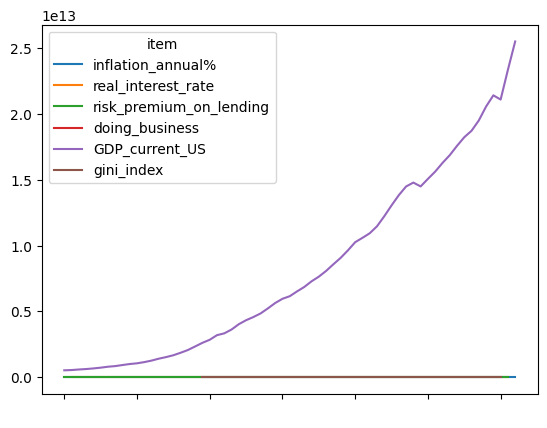

In [66]:
f_data2.plot()

In [67]:
plt.show()

In [68]:
f_data2.show()

AttributeError: 'DataFrame' object has no attribute 'show'

In [69]:
ts.plot()

NameError: name 'ts' is not defined

<Axes: >

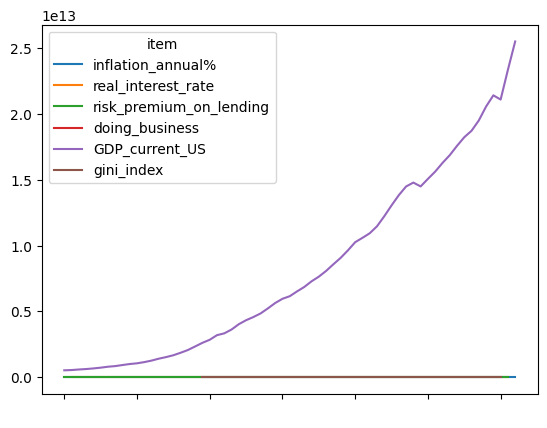

In [70]:
f_data2.plot()

In [73]:
f_data2 = f_data2.cumsum()
f_data2

item,country,date,inflation_annual%,real_interest_rate,risk_premium_on_lending,doing_business,GDP_current_US,gini_index
,United States,1960-01-01,1.457976,NaN,1.874167,NaN,5.433000e+11,NaN
,United StatesUnited StatesUnited States,1960-01-011960-01-011961-01-01,3.986676,3.107885,5.872500,NaN,1.649900e+12,NaN
,United StatesUnited StatesUnited StatesUnited ...,1960-01-011960-01-011961-01-011960-01-011961-0...,7.714150,9.431116,11.592500,NaN,3.361600e+12,NaN
,United StatesUnited StatesUnited StatesUnited ...,1960-01-011960-01-011961-01-011960-01-011961-0...,12.681293,19.129229,18.655833,NaN,5.711900e+12,NaN
,United StatesUnited StatesUnited StatesUnited ...,1960-01-011960-01-011961-01-011960-01-011961-0...,18.927347,31.779011,26.666667,NaN,8.748000e+12,NaN
...,...,...,...,...,...,...,...,...
,United StatesUnited StatesUnited StatesUnited ...,1960-01-011960-01-011961-01-011960-01-011961-0...,7560.172493,6324.658105,3907.150000,NaN,6.916560e+15,33150.8
,United StatesUnited StatesUnited StatesUnited ...,1960-01-011960-01-011961-01-011960-01-011961-0...,7783.423177,6545.139190,4062.930833,6.0,7.364191e+15,34808.4
,United StatesUnited StatesUnited StatesUnited ...,1960-01-011960-01-011961-01-011960-01-011961-0...,8007.907446,6767.830685,4221.874167,NaN,7.832883e+15,36505.7
,United StatesUnited StatesUnited StatesUnited ...,1960-01-011960-01-011961-01-011960-01-011961-0...,8237.089574,6989.332823,4384.023611,NaN,8.324889e+15,NaN


In [72]:
f_data2

item,country,date,inflation_annual%,real_interest_rate,risk_premium_on_lending,doing_business,GDP_current_US,gini_index
,United States,1960-01-01,1.457976,NaN,1.874167,NaN,5.433000e+11,NaN
,United StatesUnited States,1960-01-011961-01-01,2.528700,3.107885,3.998333,NaN,1.106600e+12,NaN
,United StatesUnited StatesUnited States,1960-01-011961-01-011962-01-01,3.727473,6.323231,5.720000,NaN,1.711700e+12,NaN
,United StatesUnited StatesUnited StatesUnited ...,1960-01-011961-01-011962-01-011963-01-01,4.967143,9.698113,7.063333,NaN,2.350300e+12,NaN
,United StatesUnited StatesUnited StatesUnited ...,1960-01-011961-01-011962-01-011963-01-011964-0...,6.246054,12.649782,8.010833,NaN,3.036100e+12,NaN
...,...,...,...,...,...,...,...,...
,United StatesUnited StatesUnited StatesUnited ...,1960-01-011961-01-011962-01-011963-01-011964-0...,221.438474,217.053994,152.570000,NaN,4.262499e+14,1616.1
,United StatesUnited StatesUnited StatesUnited ...,1960-01-011961-01-011962-01-011963-01-011964-0...,223.250684,220.481084,155.780833,6.0,4.476309e+14,1657.6
,United StatesUnited StatesUnited StatesUnited ...,1960-01-011961-01-011962-01-011963-01-011964-0...,224.484269,222.691495,158.943333,NaN,4.686914e+14,1697.3
,United StatesUnited StatesUnited StatesUnited ...,1960-01-011961-01-011962-01-011963-01-011964-0...,229.182128,221.502138,162.149444,NaN,4.920065e+14,NaN


<Axes: >

<Figure size 640x480 with 0 Axes>

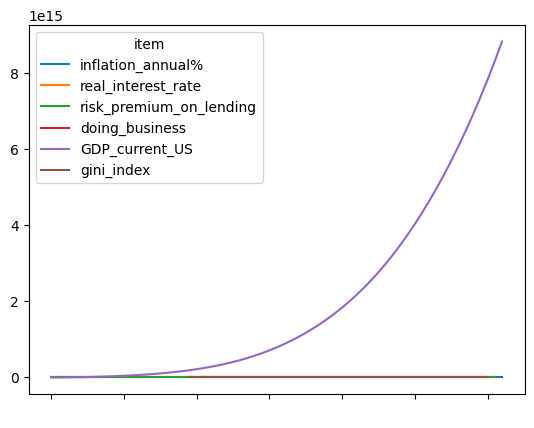

In [74]:
plt.figure()
f_data2.plot()

In [76]:
f_data2.T.plot.bar()
plt.title("US Real Interest")

TypeError: no numeric data to plot

In [77]:
f_data3

country,date,inflation_annual%,real_interest_rate,risk_premium_on_lending,doing_business,GDP_current_US,gini_index
United States,1960-01-01,1.457976,nan,1.874167,nan,543300000000.000000,nan
United States,1961-01-01,1.070724,3.107885,2.124167,nan,563300000000.000000,nan
United States,1962-01-01,1.198773,3.215346,1.721667,nan,605100000000.000000,nan
United States,1963-01-01,1.239669,3.374882,1.343333,nan,638600000000.000000,nan
United States,1964-01-01,1.278912,2.951669,0.947500,nan,685800000000.000000,nan
United States,1965-01-01,1.585169,2.565913,0.586667,nan,743700000000.000000,nan
United States,1966-01-01,3.015075,2.649421,0.743333,nan,815000000000.000000,nan
United States,1967-01-01,2.772786,2.406227,1.301667,nan,861700000000.000000,nan
United States,1968-01-01,4.271796,1.863911,0.965833,nan,942500000000.000000,nan
United States,1969-01-01,5.462386,2.851773,1.263333,nan,1019900000000.000000,nan


In [82]:
graph = sns.load_dataset("filtered2.csv")

ValueError: 'filtered2.csv' is not one of the example datasets.

In [86]:
penguins = sns.load_dataset("f_data2")

ValueError: 'f_data2' is not one of the example datasets.

In [85]:
penguins.head(40)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


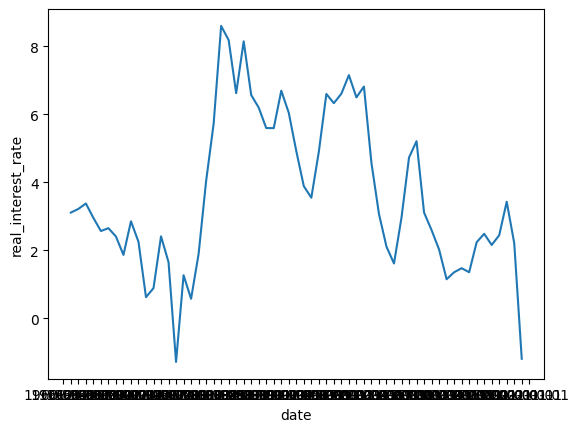

In [92]:
csv = pd.read_csv(r'filtered2.csv')
res = sns.lineplot(x = "date", y = "real_interest_rate", data = csv)
plt.show()